1. Setup and Import Libraries

In [ ]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


2. Load Dataset

In [ ]:
# Load data
train_df = pd.read_csv('/content/drive/MyDrive/House price ds/train.csv')
train_df


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/House price ds/test.csv')
test_df


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [ ]:
# View first 5 rows
print(train_df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Check missing values
print(train_df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


3. Data Cleaning & Preprocessing

Handle missing values

Encode categorical features

Align train and test datasets

Drop irrelevant columns (Id)

In [ ]:
# Drop 'Id' column
train_df = train_df.drop('Id', axis=1)
test_df = test_df.drop('Id', axis=1)


# Step 1: Handle missing values
# Numerical columns: fill missing values with median
num_cols = train_df.select_dtypes(include=np.number).columns
for col in num_cols:
    train_df[col] = train_df[col].fillna(train_df[col].median())
    if col in test_df.columns:
        test_df[col] = test_df[col].fillna(test_df[col].median())

# Categorical columns: fill missing values with mode
cat_cols = train_df.select_dtypes(include='object').columns
for col in cat_cols:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])
    if col in test_df.columns:
        test_df[col] = test_df[col].fillna(test_df[col].mode()[0])


# Step 2: Convert categorical columns to numeric (one-hot encoding)
train_df = pd.get_dummies(train_df, drop_first=True)
test_df = pd.get_dummies(test_df, drop_first=True)


# Step 3: Align test dataset with train dataset features
test_df = test_df.reindex(columns=train_df.columns.drop('SalePrice'), fill_value=0)


# Step 4: Separate features and target
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

# Check if missing values are handled
print("Missing values in train data:\n", train_df.isnull().sum().sum())
print("Missing values in test data:\n", test_df.isnull().sum().sum())

# Check shape of datasets
print("Train data shape:", train_df.shape)
print("Test data shape:", test_df.shape)

# Check first 5 rows after preprocessing
print("Train data preview:")
print(train_df.head())


Missing values in train data:
 0
Missing values in test data:
 0
Train data shape: (1460, 245)
Test data shape: (1459, 244)
Train data preview:
   MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLI  \
0          2003       196.0         706           0  ...           False   
1          1976         0.0         978           0  ...           False   
2          2002       162.0         486           0  ...           False   
3          1970         0.0         216           0  ...           False   
4          2000    

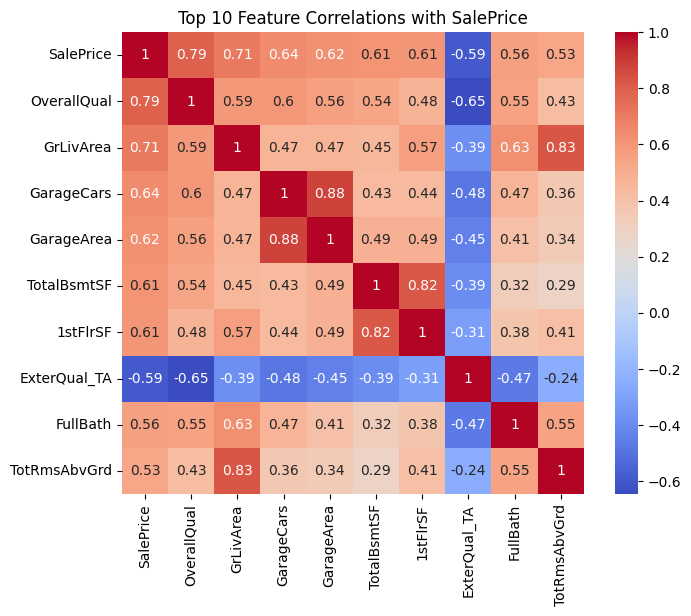

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrix
corr = train_df.corr()

# Select top 10 features most correlated with SalePrice
top_features = corr['SalePrice'].abs().sort_values(ascending=False).head(10).index

# Create a smaller heatmap
plt.figure(figsize=(8,6))
sns.heatmap(train_df[top_features].corr(), annot=True, cmap='coolwarm', square=True)
plt.title("Top 10 Feature Correlations with SalePrice")
plt.show()


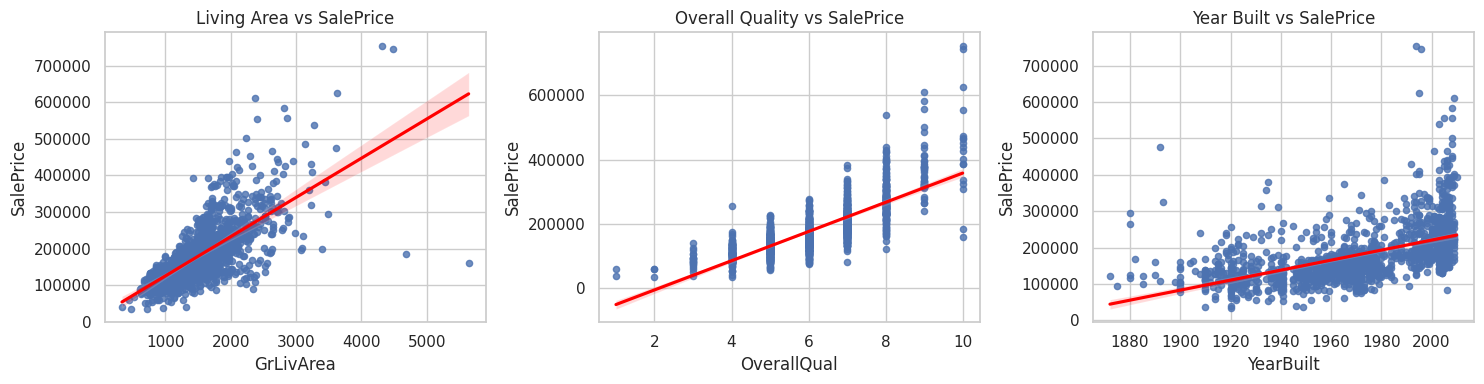

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Create figure with multiple small charts
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot 1: GrLivArea vs SalePrice
sns.regplot(x='GrLivArea', y='SalePrice', data=train_df, ax=axes[0], scatter_kws={'s': 20}, line_kws={'color': 'red'})
axes[0].set_title('Living Area vs SalePrice')

# Plot 2: OverallQual vs SalePrice
sns.regplot(x='OverallQual', y='SalePrice', data=train_df, ax=axes[1], scatter_kws={'s': 20}, line_kws={'color': 'red'})
axes[1].set_title('Overall Quality vs SalePrice')

# Plot 3: YearBuilt vs SalePrice
sns.regplot(x='YearBuilt', y='SalePrice', data=train_df, ax=axes[2], scatter_kws={'s': 20}, line_kws={'color': 'red'})
axes[2].set_title('Year Built vs SalePrice')

plt.tight_layout()
plt.show()


Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training features shape:", X_train.shape)
print("Validation features shape:", X_val.shape)


Training features shape: (1168, 244)
Validation features shape: (292, 244)


Train Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on validation set
y_pred = model.predict(X_val)


Evaluate the Model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"RMSE on validation set: {rmse:.2f}")

# R² score
r2 = r2_score(y_val, y_pred)
print(f"R² score on validation set: {r2:.4f}")


RMSE on validation set: 51392.66
R² score on validation set: 0.6557


Visualize Actual vs Predicted Prices

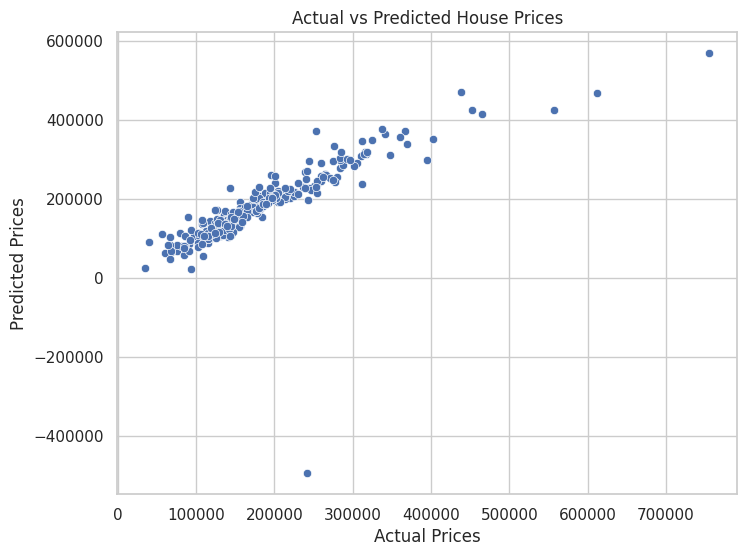

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_val, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


Predict on Test Dataset

In [ ]:
# Make predictions for the test data
test_predictions = model.predict(test_df)

# Preview predictions
print("First 10 predicted prices on test data:")
print(test_predictions[:10])

# Optional: create submission file
submission = pd.DataFrame({
    'Id': range(1461, 1461 + len(test_predictions)),
    'SalePrice': test_predictions
})
submission.to_csv('house_price_predictions.csv', index=False)
print("Submission file created: house_price_predictions.csv")


First 10 predicted prices on test data:
[-448699.85091122 -407002.52302632 -381360.89844265 -368027.29237715
 -357666.26170483 -396002.40022867 -392873.63961974 -411148.7414285
 -357897.41391934 -452567.88705285]
Submission file created: house_price_predictions.csv
